In [1]:
### BEGIN setup_matplotlib
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    # %matplotlib inline 
    from matplotlib import rcParams 
    
    # rcParams['figure.max_open_warning'] = 0
    # rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    # rcParams['font.family'] = ['serif']
    # rcParams['mathtext.fontset'] = 'dejavuserif'
    # rcParams['axes.formatter.use_mathtext'] = True
    
    try:
        from IPython.display import set_matplotlib_formats
        set_matplotlib_formats('png','pdf')
    except Exception as e:
        pass 
    
### END setup_matplotlib
_setup_matplotlib()

In [2]:
from numpy import meshgrid, ones_like, histogram2d
from matplotlib.pyplot import subplot 
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D

In [3]:
from numpy.random import normal
from numpy import sqrt
xy   = normal(size=(1000,2))

In [4]:
h, xb, yb = histogram2d(xy[:,0],xy[:,1],density=True)
b         = ones_like(h)*h.min()
xx, yy    = meshgrid(xb[:-1],          yb[:-1])
xw, yw    = meshgrid((xb[1:]-xb[:-1]), (yb[1:]-yb[:-1]))
e         = sqrt(h/(xw*yw*len(xy)))
x1, y1    = xx.ravel(), yy.ravel()
xd, yd,   = xw.ravel(), yw.ravel() 
xc, yc    = x1+xd/2,    y1+yd/2

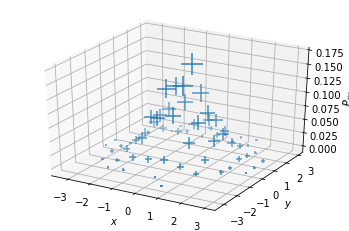

In [5]:
ax    = subplot(1,1,1,projection='3d')  # Needed for 3D
ppd   = 72./ax.figure.dpi               # Scale to plot
trans = ax.transData.transform
s     = [((trans((1,ee))-trans((0,0)))*ppd)[1]**2 for ee in e.ravel()]
ax.scatter3D(xc, yc, h.ravel(), s=s,marker='+',zorder=10 ,depthshade=True)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$P_{xy}$');